# What is EDA?

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Before applying any ML algorithms in data, we need to understand the data which we are going to follow. Without data understanding there will be a possibility of ML model failure. The understanding of data is nothing but this Exploratory Data Analysis (EDA).

It is always better to explore each data set using multiple exploratory techniques and compare the results. Once the data set is fully understood, it is quite possible that data scientist will have to go back to data collection and cleansing phases in order to transform the data set according to the desired business outcomes. The goal of this step is to become confident that the data set is ready to be used in a machine learning algorithm.

<img src="https://miro.medium.com/max/694/1*b4wnyQVCYgJpWHhXFwtNjA.png" width="350">

# Import the necessary Libraries and Packages

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Dataset

In [50]:
train=pd.read_csv('Downloads/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Important Note:
- Above data Columns like Pclasss , Sex , Embarked , Survived are Categorical.
- Fare, Age columns are Continuous.

# Univariate EDA:

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words the data has only one variable. 

## Count of Survived and Not Survived:

In [51]:
pd.crosstab(train.Survived,columns='count',margins=True)

col_0,count,All
Survived,,
0,549,549
1,342,342
All,891,891


## All Numerical Column Basic Statistics:

In [52]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Single Numeric Column Basic Statistics:

In [53]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Visualizing Survived vs Not Survived:

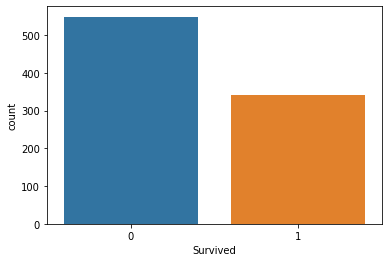

In [55]:
sns.countplot(data=train,x='Survived')

## Visual EDA for single Categorical Column: "Embarked"

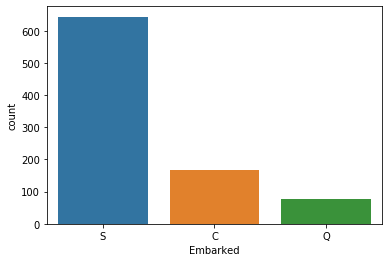

In [56]:
sns.countplot(data=train,x='Embarked')

Countplot shows the counts of observations in each categorical bin using bars.
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

## Visual EDA for single Continuous Column: "Fare" using Distribution Plot

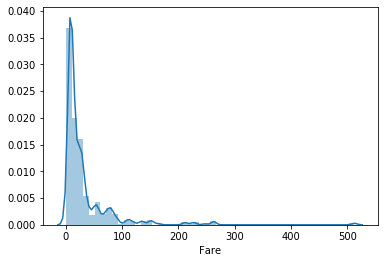

In [57]:
sns.distplot(train.Fare,hist=True)

The distplot figure factory displays a combination of statistical representations of numerical data, such as histogram, kernel density estimation or normal curve, and rug plot.Function distplot() provides the most convenient way to take a quick look at univariate distribution.This function will plot a histogram that fits the kernel density estimation of the data.

## Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

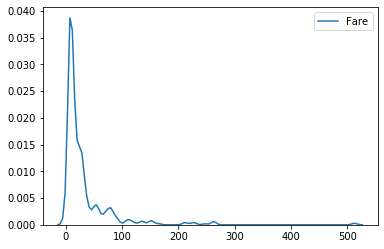

In [58]:
sns.kdeplot(train.Fare)

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

Setting the **hist** flag to **False** in **distplot** will yield the kernel density estimation plot.

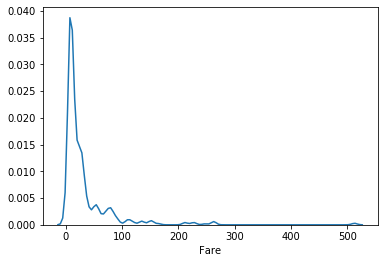

In [59]:
sns.distplot(train.Fare, hist=False)

# Bivariate EDA:

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

## Males and Females Survived and Not Survived in each Class: 

In [60]:
pd.crosstab([train.Pclass,train.Sex,train.Survived],columns='count',margins=True)

col_0                   count  All
Pclass Sex    Survived            
1      female 0             3    3
              1            91   91
       male   0            77   77
              1            45   45
2      female 0             6    6
              1            70   70
       male   0            91   91
              1            17   17
3      female 0            72   72
              1            72   72
       male   0           300  300
              1            47   47
All                       891  891

## Visualizing Survived and Not Survived with respect to the 'Embarked' Column:

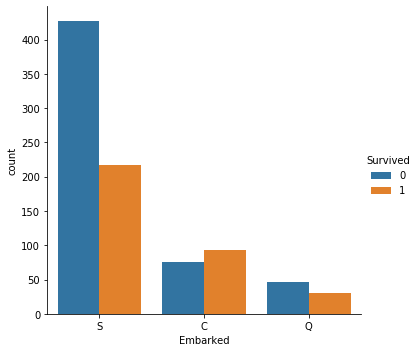

In [61]:
sns.factorplot(x='Embarked',hue='Survived',data=train, kind='count',size=5)

A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.The **hue** parameter determines which column in the data frame should be used for colour encoding.

## Desnity Graph based on Fare and Survival Rate:

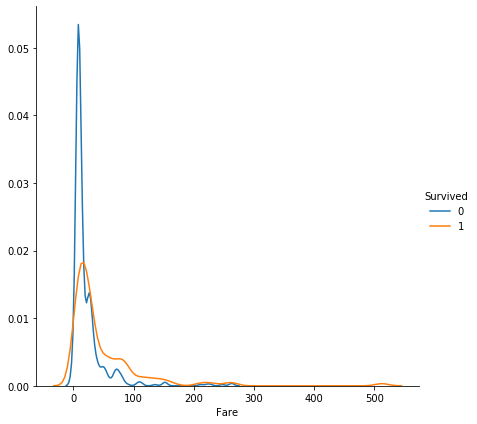

In [62]:
sns.FacetGrid(data=train,hue='Survived',size=6).map(sns.kdeplot,"Fare").add_legend()

Facet grid forms a matrix of panels defined by row and column by dividing the variables. Due of panels, a single plot looks like multiple plots. It is very helpful to analyze all combinations in two discrete variables.

## Distplot based on Fare and Survival Rate:

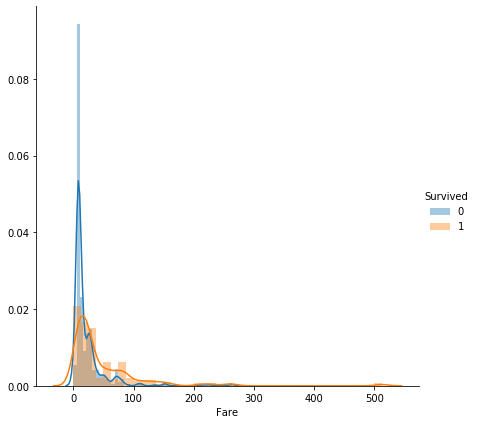

In [63]:
sns.FacetGrid(data=train,hue='Survived',size=6).map(sns.distplot,"Fare").add_legend()

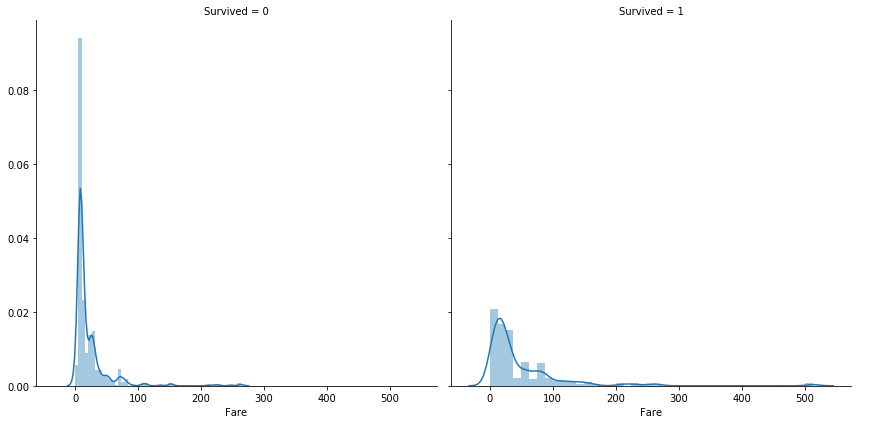

In [64]:
sns.FacetGrid(data=train,col='Survived',size=6).map(sns.distplot,"Fare").add_legend()

## Graph of how Age and Fare are related:

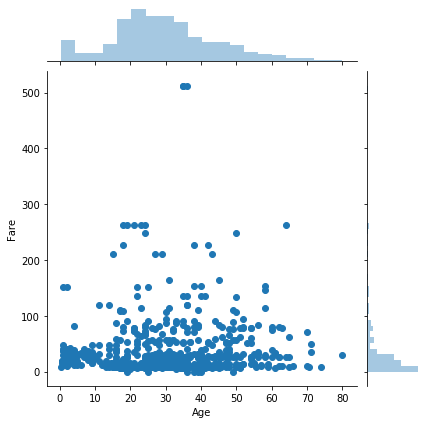

In [65]:
sns.jointplot(x='Age',y='Fare',data=train)

# Multivariate EDA:

## Does Age have an impact on Survival Rate for each Sex and Class group?

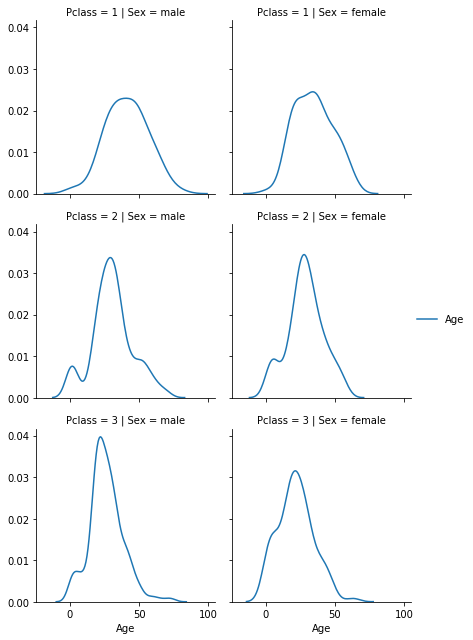

In [66]:
sns.FacetGrid(data=train,row='Pclass',col='Sex').map(sns.kdeplot,"Age").add_legend()

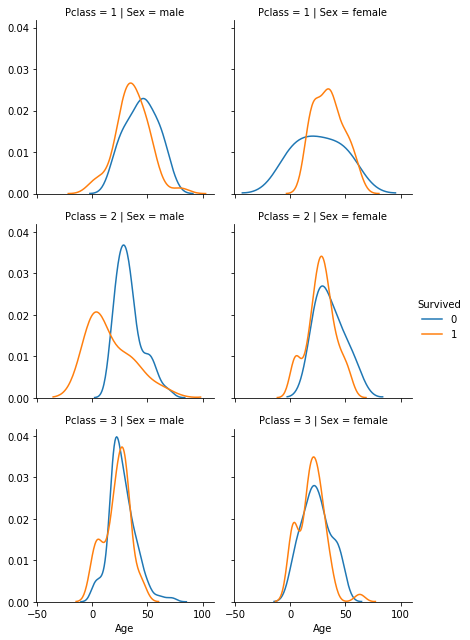

In [67]:
sns.FacetGrid(data=train,row='Pclass',col='Sex' ,hue='Survived').map(sns.kdeplot,"Age").add_legend()

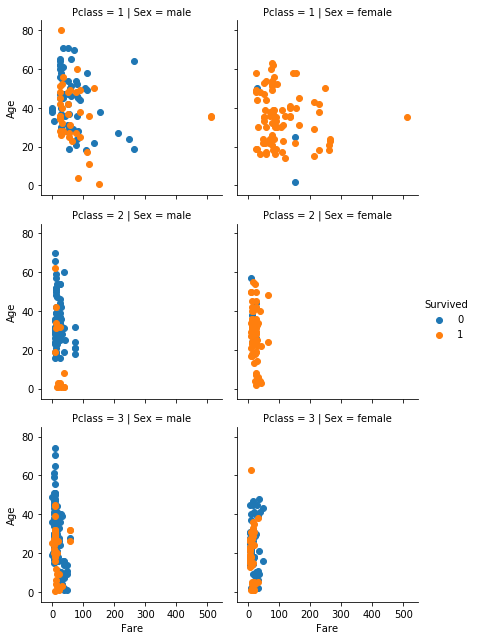

In [68]:
sns.FacetGrid(data=train,row='Pclass',col='Sex' ,hue='Survived').map(plt.scatter,"Fare","Age").add_legend()